In [ ]:
import duckdb as db

store = db.connect("/tmp/provision.db")

for sql in [
    "CREATE SEQUENCE if not exists id_provision START 1;",
    "create table if not exists provision (id INT default nextval('id_provision'), created date default current_date(), name varchar, course varchar, contact varchar, expired date, memo varchar)"
]:
    store.execute(sql)



In [ ]:
store.execute("insert into provision (name, password, course, contact, expired, memo) values (?, ?, ?, ?, ?, ?)", ["aaron", "24lecture", "wx", None, None])

In [ ]:
store.execute("from provision").fetch_df()

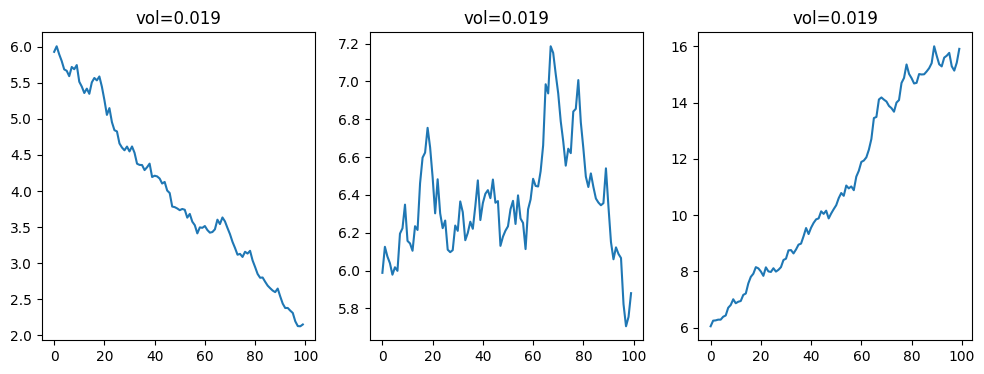

In [32]:
import numpy as np
import matplotlib.pyplot as plt

returns = np.random.normal(0, 0.02, size=100)

fig, axes = plt.subplots(1, 3, figsize=(12,4))
c0 = np.random.randint(5, 50)

for i, alpha in enumerate((-0.01, 0, 0.01)):
    r = returns + alpha
    close = np.cumprod(1 + r) * c0
    vol = round(np.std(r), 3)
    axes[i].set_title(f"vol={vol}")
    axes[i].plot(close)